DATA QUALITY ASSESSMENT : BEFORE

In [4]:
# Import necessary libraries
import os
from PIL import Image
import numpy as np
import pandas as pd
import imageio
import random
import matplotlib.pyplot as plt
import cv2

In [20]:
# Path to the dataset
dataset_path = r'Dataset_BUSI_with_GT'

In [21]:
#Function to convert each image to a list

def assess_folder_dataframe(folder_path):
    results = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                results.append({"Class": class_name, "Image": image_name,})
    return results

In [22]:
quality_results = assess_folder_dataframe(dataset_path)
# Create a DataFrame and display it
df = pd.DataFrame(quality_results)
print(df)

       Class                 Image
0     benign        benign (1).png
1     benign   benign (1)_mask.png
2     benign       benign (10).png
3     benign  benign (10)_mask.png
4     benign      benign (100).png
...      ...                   ...
1564  normal       normal (97).png
1565  normal  normal (97)_mask.png
1566  normal       normal (98).png
1567  normal       normal (99).png
1568  normal  normal (99)_mask.png

[1569 rows x 2 columns]


In [23]:
#Dataset size
num_images = len(df)
num_classes = df['Class'].nunique()
print(f"\nNumber of Images: {num_images}")
print(f"Number of Classes: {num_classes}")


Number of Images: 1569
Number of Classes: 3


In [24]:
#Class distribution
Class_distribution = df.groupby('Class').size().reset_index(name='Number of Images')
Class_distribution

,Class,Number of Images
0,benign,891
1,malignant,420
2,normal,258


<Figure size 800x500 with 0 Axes>

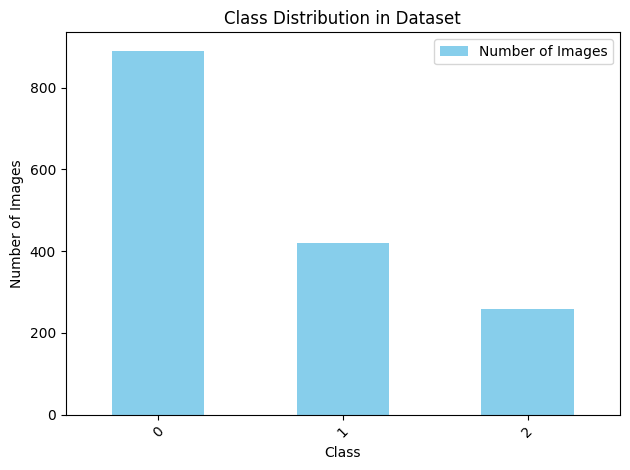

In [25]:
#Visualizing the Class Distribution
plt.figure(figsize=(8, 5))
Class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loading image from: Dataset_BUSI_with_GT/benign\benign (175)_mask.png
Loading image from: Dataset_BUSI_with_GT/benign\benign (122)_mask.png
Loading image from: Dataset_BUSI_with_GT/benign\benign (180).png
Loading image from: Dataset_BUSI_with_GT/benign\benign (386)_mask.png
Loading image from: Dataset_BUSI_with_GT/benign\benign (295).png


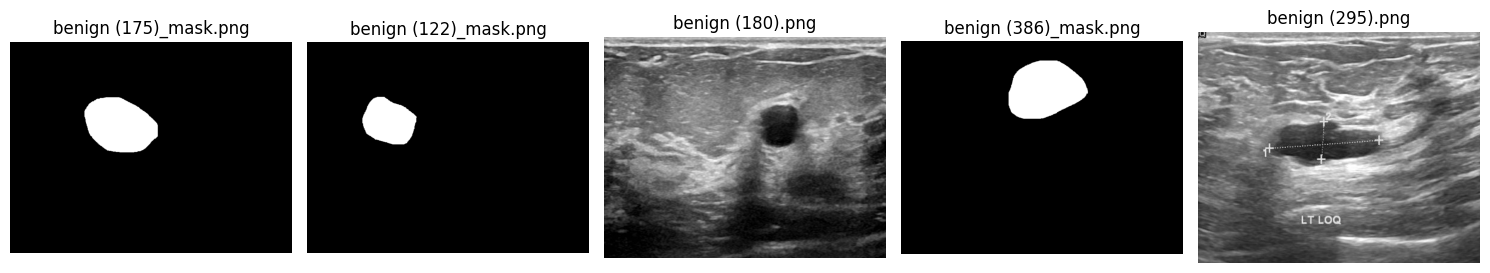

In [26]:
#Visualizing sample image in each class

def display_random_images_from_folder(folder_path, images_to_display=5):
    # List all images in the folder
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.png')]
    
    # Randomly select 5 images
    selected_images = random.sample(all_images, min(images_to_display, len(all_images)))
    
    plt.figure(figsize=(15, 10))
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(folder_path, img_name) 
        print(f"Loading image from: {img_path}")
        try:
            img = Image.open(img_path) # Open the image
            plt.subplot(1, images_to_display, i + 1)
            plt.imshow(img)
            plt.title(img_name)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    plt.tight_layout()
    plt.show()

#the folder path containing the images
folder_path = 'Dataset_BUSI_with_GT/benign'

#function to display images
display_random_images_from_folder('Dataset_BUSI_with_GT/benign')

Loading image from: Dataset_BUSI_with_GT/malignant\malignant (183)_mask.png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (118)_mask.png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (19).png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (17)_mask.png
Loading image from: Dataset_BUSI_with_GT/malignant\malignant (41).png


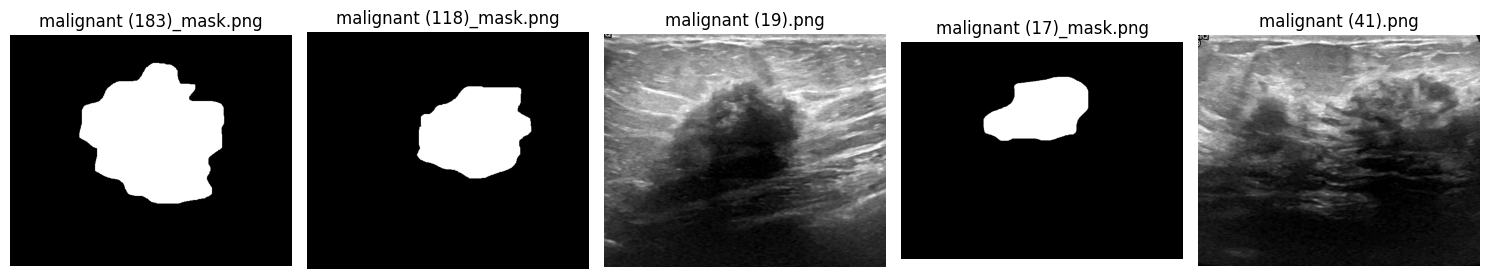

In [27]:
# Call the function to display Malignant class images
display_random_images_from_folder('Dataset_BUSI_with_GT/malignant')

Loading image from: Dataset_BUSI_with_GT/normal\normal (68)_mask.png
Loading image from: Dataset_BUSI_with_GT/normal\normal (71).png
Loading image from: Dataset_BUSI_with_GT/normal\normal (101)_mask.png
Loading image from: Dataset_BUSI_with_GT/normal\normal (133).png
Loading image from: Dataset_BUSI_with_GT/normal\normal (38)_mask.png


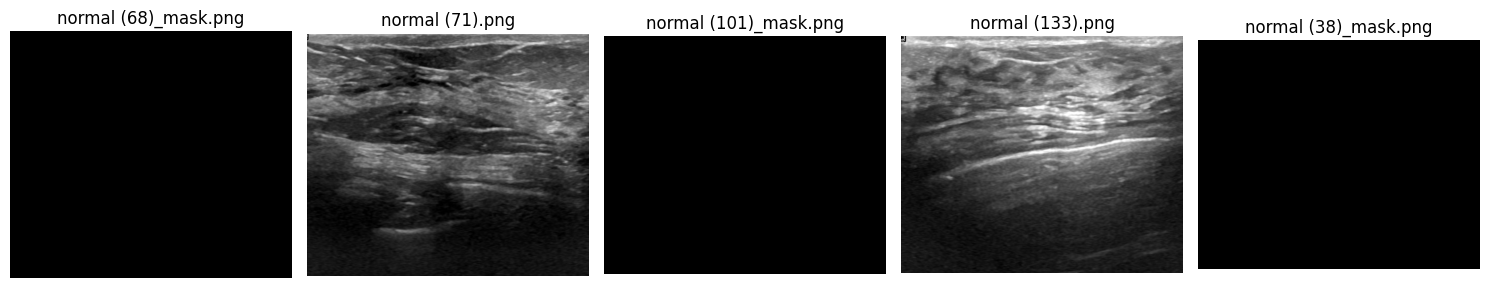

In [28]:
# Call the function to display Normal class images
display_random_images_from_folder('Dataset_BUSI_with_GT/normal')

TO DETECT THE CORRUPT AND DUPLICATE IMAGES

In [32]:

def get_image_resolutions_range(folder_path):
    min_width = float('inf')
    max_width = 0
    min_height = float('inf')
    max_height = 0
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png')):
            try:
                with Image.open(os.path.join(folder_path, filename)) as img:
                    width, height = img.size
                    # Update min and max values
                    if width < min_width:
                        min_width = width
                    if width > max_width:
                        max_width = width
                    if height < min_height:
                        min_height = height
                    if height > max_height:
                        max_height = height
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    return (min_width, min_height), (max_width, max_height)

# Example usage
folder_path = 'Dataset_BUSI_with_GT/benign'
min_res, max_res = get_image_resolutions_range(folder_path)
print(f"Minimum resolution: {min_res}")
print(f"Maximum resolution: {max_res}")


Minimum resolution: (315, 324)
Maximum resolution: (1028, 719)


In [33]:
folder_path = 'Dataset_BUSI_with_GT/malignant'
min_res, max_res = get_image_resolutions_range(folder_path)
print(f"Minimum resolution: {min_res}")
print(f"Maximum resolution: {max_res}")

Minimum resolution: (190, 332)
Maximum resolution: (1048, 677)


In [34]:
folder_path = 'Dataset_BUSI_with_GT/normal'
min_res, max_res = get_image_resolutions_range(folder_path)
print(f"Minimum resolution: {min_res}")
print(f"Maximum resolution: {max_res}")

Minimum resolution: (391, 310)
Maximum resolution: (948, 712)


In [29]:
# Def base directory for images
base_dir = 'Dataset_BUSI_with_GT'

# Initialize lists for tracking issues
corrupted_images = []
duplicate_images = []
image_hashes = set()  # To track unique images

# Check image quality
for index, row in df.iterrows():
    img_name = row['Image']
    img_class = row['Class']
    img_path = os.path.join(base_dir, img_class, img_name)
    
    print(f"Checking image: {img_path}")  # Debugging statement
    try:
        # Use imageio to read the image
        img = imageio.imread(img_path)
        
        # Create a hash of the image bytes for duplicate checking
        img_hash = hash(img.tobytes())
        
        # Check for duplicates
        if img_hash in image_hashes:
            duplicate_images.append(img_path)
        else:
            image_hashes.add(img_hash)
    
    except Exception as e:
        print(f"Corrupted image or error loading {img_path}: {e}")
        corrupted_images.append(img_path)

#Summary of findings
print("\nCorrupted Images:")
print(corrupted_images)

print("\nDuplicate Images:")
print(duplicate_images)

#save the results to a CSV file
pd.DataFrame(corrupted_images, columns=['Corrupted Images']).to_csv('corrupted_images.csv', index=False)
pd.DataFrame(duplicate_images, columns=['Duplicate Images']).to_csv('duplicate_images.csv', index=False)

Checking image: Dataset_BUSI_with_GT\benign\benign (1).png


C:\Users\USER PC\AppData\Local\Temp\ipykernel_12212\2677751317.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


Checking image: Dataset_BUSI_with_GT\benign\benign (1)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (10).png
Checking image: Dataset_BUSI_with_GT\benign\benign (10)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (100).png
Checking image: Dataset_BUSI_with_GT\benign\benign (100)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (100)_mask_1.png
Checking image: Dataset_BUSI_with_GT\benign\benign (101).png
Checking image: Dataset_BUSI_with_GT\benign\benign (101)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (102).png
Checking image: Dataset_BUSI_with_GT\benign\benign (102)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (103).png
Checking image: Dataset_BUSI_with_GT\benign\benign (103)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (104).png
Checking image: Dataset_BUSI_with_GT\benign\benign (104)_mask.png
Checking image: Dataset_BUSI_with_GT\benign\benign (105).png
Checking image: Dataset_BUSI_with_GT\benign\ben

Observation
1. The data set is  higly Imbalance
2. There are 9 duplicated images
3. The images are not of uniform resolution

DATA QUALITY ASSESSMENT : AFTER

In [36]:

import hashlib
#from PIL import Image
import shutil

def calculate_image_hash(image_path):
    """Calculate a hash for an image using MD5."""
    with Image.open(image_path) as img:
        # Resize image to standardize the hash (optional step)
        img = img.resize((256, 256))  
        # Convert the image to RGB mode
        img = img.convert("RGB")
        # Generate the hash
        return hashlib.md5(img.tobytes()).hexdigest()

def remove_duplicate_images(source_folder, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    hashes = set()  # To store unique image hashes
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png')):
            try:
                image_path = os.path.join(source_folder, filename)
                image_hash = calculate_image_hash(image_path)
                
                # Check if the hash is already in the set (duplicate)
                if image_hash not in hashes:
                    hashes.add(image_hash)
                    # Copy unique image to the new folder
                    shutil.copy(image_path, os.path.join(destination_folder, filename))
                else:
                    print(f"Duplicate found and skipped: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

#
source_folder = r'Dataset_BUSI_with_GT\benign'  # Folder with original images
destination_folder = 'Unique\BE'  # Folder for unique images

remove_duplicate_images(source_folder, destination_folder)
print(f"Unique images have been copied to: {destination_folder}")


Unique images have been copied to: Unique\BE


In [37]:
#
source_folder = r'Dataset_BUSI_with_GT\malignant'  # Folder with original images
destination_folder = 'Unique\MA'  # Folder for unique images

remove_duplicate_images(source_folder, destination_folder)
print(f"Unique images have been copied to: {destination_folder}")

Unique images have been copied to: Unique\MA


In [39]:
#
source_folder = r'Dataset_BUSI_with_GT\normal'  # Folder with original images
destination_folder = 'Unique/NO'  # Folder for unique images

remove_duplicate_images(source_folder, destination_folder)
print(f"Unique images have been copied to: {destination_folder}")

Duplicate found and skipped: normal (10)_mask.png
Duplicate found and skipped: normal (100)_mask.png
Duplicate found and skipped: normal (101)_mask.png
Duplicate found and skipped: normal (102)_mask.png
Duplicate found and skipped: normal (103)_mask.png
Duplicate found and skipped: normal (104)_mask.png
Duplicate found and skipped: normal (105)_mask.png
Duplicate found and skipped: normal (106)_mask.png
Duplicate found and skipped: normal (107)_mask.png
Duplicate found and skipped: normal (108)_mask.png
Duplicate found and skipped: normal (109)_mask.png
Duplicate found and skipped: normal (11)_mask.png
Duplicate found and skipped: normal (110)_mask.png
Duplicate found and skipped: normal (111)_mask.png
Duplicate found and skipped: normal (112)_mask.png
Duplicate found and skipped: normal (113)_mask.png
Duplicate found and skipped: normal (114)_mask.png
Duplicate found and skipped: normal (115)_mask.png
Duplicate found and skipped: normal (116)_mask.png
Duplicate found and skipped: norm

In [42]:
Unique_image = assess_folder_dataframe('Unique')
df = pd.DataFrame(Unique_image)
#Dataset size
num_images = len(df)
num_classes = df['Class'].nunique()
print(f"\nNumber of Images: {num_images}")
print(f"Number of Classes: {num_classes}")



Number of Images: 1445
Number of Classes: 3


In [52]:
#Class distribution
Class_distribution = df.groupby('Class').size().reset_index(name='Number of Images')
Class_distribution

,Class,Number of Images
0,BE,891
1,MA,420
2,NO,134


Solve the Imabalance issue by dowmsamplig method

In [43]:
def load_images_from_folder(folder):
    images = []
    
    for filename in os.listdir(folder):
        if filename.endswith(('.png')):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            images.append(img)
    
    return images


In [45]:
#Load Benign class Images  
BI= load_images_from_folder('Unique\BE')
#Load Malignant class Images 
MI= load_images_from_folder('Unique\MA')
#Load Normal class Images 
NI= load_images_from_folder(r'Unique\NO')


To convert the images resolution to a Uniform Resolution Suitable for training  the Neural Network


In [53]:
def resize_images_in_folder(input_folder, size=(224, 224)):
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            try:
                img_path = os.path.join(input_folder, filename)
                with Image.open(img_path) as img:
                    # Resize the image
                    img_resized = img.resize(size)
                    # Save the resized image, replacing the original
                    img_resized.save(img_path)
                    print(f"Resized and replaced {filename} to {size}")
            except Exception as e:
                print(f"Error resizing {filename}: {e}")


In [54]:
# :
resize_images_in_folder('Unique\BE', size=(224, 224))

resize_images_in_folder('Unique\MA', size=(224, 224))

resize_images_in_folder(r'Unique\NO', size=(224, 224))



Resized and replaced benign (1).png to (224, 224)
Resized and replaced benign (1)_mask.png to (224, 224)
Resized and replaced benign (10).png to (224, 224)
Resized and replaced benign (10)_mask.png to (224, 224)
Resized and replaced benign (100).png to (224, 224)
Resized and replaced benign (100)_mask.png to (224, 224)
Resized and replaced benign (100)_mask_1.png to (224, 224)
Resized and replaced benign (101).png to (224, 224)
Resized and replaced benign (101)_mask.png to (224, 224)
Resized and replaced benign (102).png to (224, 224)
Resized and replaced benign (102)_mask.png to (224, 224)
Resized and replaced benign (103).png to (224, 224)
Resized and replaced benign (103)_mask.png to (224, 224)
Resized and replaced benign (104).png to (224, 224)
Resized and replaced benign (104)_mask.png to (224, 224)
Resized and replaced benign (105).png to (224, 224)
Resized and replaced benign (105)_mask.png to (224, 224)
Resized and replaced benign (106).png to (224, 224)
Resized and replaced be

To fix the Imbalance
1. Downsample the Benign class dataset to 420 match the Malignant class.
2. Apply data augumentation method to Malignant and Normal class.

In [49]:
import os
import shutil
from sklearn.utils import resample

def downsample_class(dataset_path, class_name, target_count):
    class_path = os.path.join(dataset_path, class_name)
    
    # Check for valid image files
    valid_extensions = ('.png')  # Add more extensions if needed
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) 
              if img.lower().endswith(valid_extensions) and os.path.isfile(os.path.join(class_path, img))]
    
    original_count = len(images)
    print(f'Original {class_name} class count: {original_count}')
    
    if original_count < target_count:
        print(f"Warning: Only {original_count} images available. Downsampling to available count.")
        downsampled_images = images  # Use all available images
    else:
        # Downsample the images
        downsampled_images = resample(images, n_samples=target_count, random_state=40)
        print(f"Downsampled to {len(downsampled_images)} images.")

    # Move downsampled images to a new folder
    new_dir = os.path.join(dataset_path, 'downsampled_BE', class_name)
    
    # Clear the old folder if it exists
    if os.path.exists(new_dir):
        shutil.rmtree(new_dir)
        
    os.makedirs(new_dir, exist_ok=True)
    
    # Copy the downsampled images
    for img in downsampled_images:
        shutil.copy(img, new_dir)
        print(f"Copied: {img}")  # Print the path of the copied image

# Downsample BE class to 420 images
downsample_class('Unique', 'BE', 588)


Original BE class count: 891
Downsampled to 588 images.
Copied: Unique\BE\benign (243).png
Copied: Unique\BE\benign (195)_mask_2.png
Copied: Unique\BE\benign (101).png
Copied: Unique\BE\benign (172)_mask.png
Copied: Unique\BE\benign (294)_mask.png
Copied: Unique\BE\benign (234).png
Copied: Unique\BE\benign (411)_mask.png
Copied: Unique\BE\benign (217).png
Copied: Unique\BE\benign (78).png
Copied: Unique\BE\benign (377)_mask.png
Copied: Unique\BE\benign (334)_mask.png
Copied: Unique\BE\benign (398).png
Copied: Unique\BE\benign (79)_mask.png
Copied: Unique\BE\benign (123).png
Copied: Unique\BE\benign (296).png
Copied: Unique\BE\benign (14).png
Copied: Unique\BE\benign (131).png
Copied: Unique\BE\benign (425)_mask.png
Copied: Unique\BE\benign (68).png
Copied: Unique\BE\benign (406)_mask.png
Copied: Unique\BE\benign (244)_mask.png
Copied: Unique\BE\benign (101)_mask.png
Copied: Unique\BE\benign (292)_mask.png
Copied: Unique\BE\benign (397)_mask.png
Copied: Unique\BE\benign (190)_mask.png
C

Model Building using Transfer Learning

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
#Step 1: Augument the Minority Normal class Images
# the augmentation generator
aug_datagen = ImageDataGenerator(
    rescale=1./255,           # Rescale pixel values to [0,1]
    rotation_range=20,        # Random rotations
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zooms
    horizontal_flip=True,     # Horizontal flips
    fill_mode='nearest'       # Fill in missing pixels
)

# Path to the minority class NO images
minority_class_dir = r'Unique'
save_dir = 'augmented_NO'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

minority_generator = aug_datagen.flow_from_directory(
    minority_class_dir,
    target_size=(224, 224),      # Same resolution for all images
    batch_size=1,                # Generate one image at a time
    class_mode=None,             # No labels needed
    save_to_dir=save_dir,        # Save the augmented images
    save_prefix='aug',           # Prefix for augmented images
    save_format='jpeg'           # Save as jpeg
)

# Augment until you have enough images (to reach 420)
n_to_generate = 420 - 134  # Generate 286 new images to balance NO class
i = 0
for _ in minority_generator:
    i += 1
    if i >= n_to_generate:
        break


Found 872 images belonging to 4 classes.


In [16]:
import shutil

In [17]:
#To combine the augument generated  images with the original images
# Path to the original NO class images
original_NO_dir = r'Unique\NO'

# Path to the folder where augmented NO images were saved
augmented_NO_dir = 'Unique/augmented_NO'

# Move augmented images to the original NO class directory
for img_file in os.listdir(augmented_NO_dir):
    src = os.path.join(augmented_NO_dir, img_file)
    dst = os.path.join(original_NO_dir, img_file)
    shutil.move(src, dst)  # You can also use shutil.copy if you want to keep the augmented images in the original folder

print("Augmented images added to the NO class directory.")


Augmented images added to the NO class directory.


In [54]:
#Step 2: Verify the Class Balance
import os

# Paths to the class folders
BE_dir = 'Unique\downsampled_BE\BE'
MO_dir = 'Unique\MA'
NO_dir = 'Unique/NO'

# Function to count the number of images in each class folder
def count_images_in_folder(folder_path):
    image_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
    return image_count

# Count the images in each folder
BE_count = count_images_in_folder(BE_dir)
MO_count = count_images_in_folder(MO_dir)
NO_count = count_images_in_folder(NO_dir)

# Print the class distribution
print(f'BE Class: {BE_count} images')
print(f'MO Class: {MO_count} images')
print(f'NO Class: {NO_count} images')

# Check if the dataset is balanced
if BE_count == MO_count == NO_count:

    print('The dataset is balanced!')
else:
    print('The dataset is not balanced yet.')


BE Class: 420 images
MO Class: 420 images
NO Class: 420 images
The dataset is balanced!


In [58]:
#Step 3: Split the data into Training and Validation sets
# Create ImageDataGenerator for splitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Specify the split ratio
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    'Unique', 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set for training data
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    'Unique',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)


Found 1008 images belonging to 3 classes.
Found 252 images belonging to 3 classes.


In [56]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load DenseNet201 pre-trained on ImageNet
base_model = DenseNet201(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Freeze base layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 196s 3us/step


In [59]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 229s 7s/step - accuracy: 0.7432 - loss: 0.6734 - val_accuracy: 0.6741 - val_loss: 0.8092
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.8125 - loss: 0.6112 - val_accuracy: 0.7143 - val_loss: 0.7737
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 230s 7s/step - accuracy: 0.7772 - loss: 0.5209 - val_accuracy: 0.6830 - val_loss: 0.7360
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.8125 - loss: 0.3664 - val_accuracy: 0.7500 - val_loss: 0.4805
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 232s 8s/step - accuracy: 0.8305 - loss: 0.4378 - val_accuracy: 0.6830 - val_loss: 0.7149
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.8438 - loss: 0.4420 - val_accuracy: 0.7857 - val_loss: 0.6024
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 243s 8s/step - accuracy: 0.8451 - loss: 0.4055 - val_accuracy: 0.8036 - val_loss: 0.4468
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.8438 - loss: 0.3567 - val_accuracy: 0.

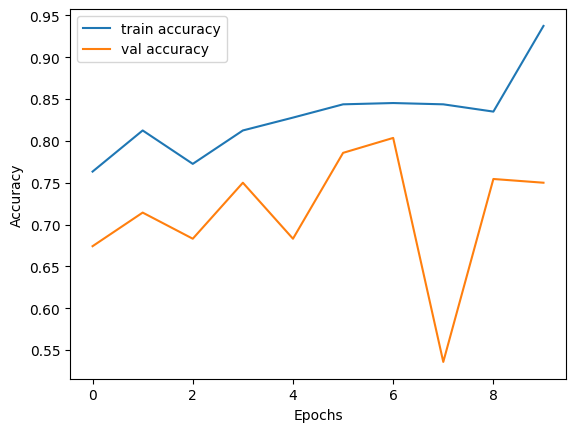

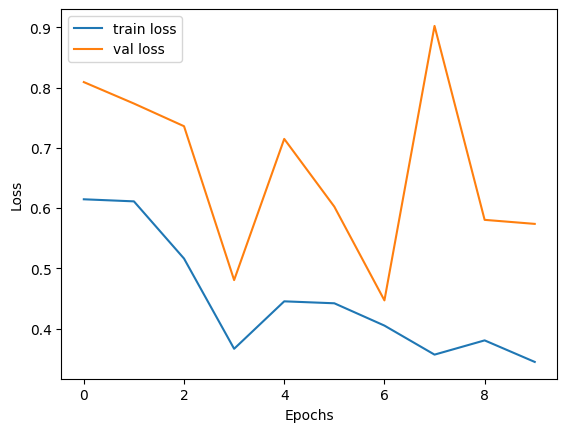

In [60]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [78]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno 11001] getaddrinfo failed

In [ ]:
# Freeze the base model
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
